# Counting site types to estimate activity

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('../scripts')
from functions import *

from tqdm.notebook import tqdm

## Plotting a single activite site-count over a potential-range

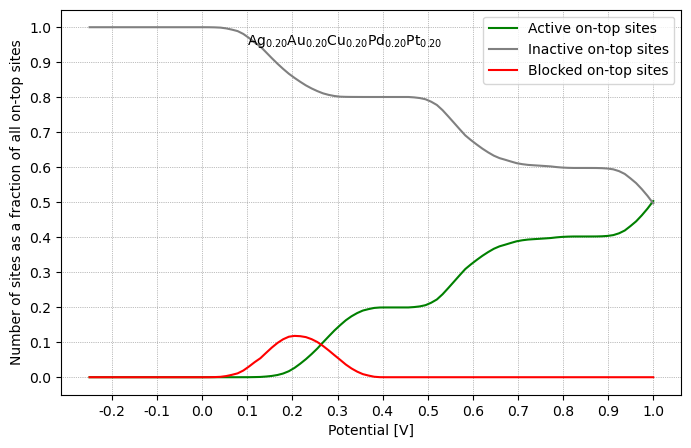

In [2]:
# Initialize a surface from a given stochiometry
dim_x, dim_y, split = 200, 200, [0.2 , 0.2 , 0.2 , 0.2 , 0.2 ]

HEA_surface = initialize_surface(dim_x, dim_y, metals, split)

# Predict energies on all sites for both adsorbates + mixed_sites
HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)

# Calculate 
potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(HEA_surface, -0.25, 1.0, 100)

# Plot and save
filename = "HEA_even.png"
counting_activity_plot(potential_range, active_list, inactive_list, blocked_list, split, filename)

## Running through all the "Special" surfaces (SWR and bimetals)

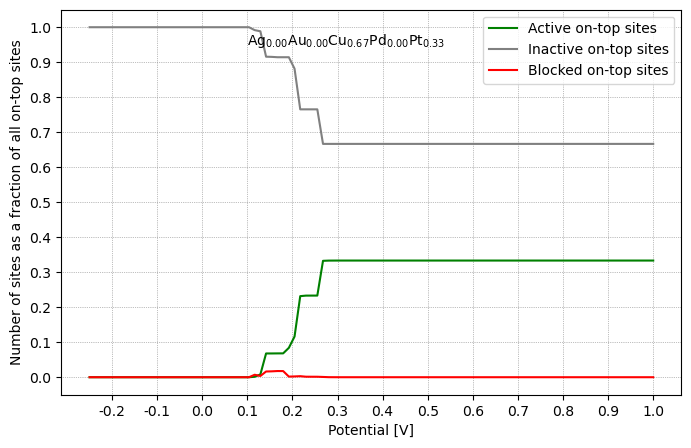

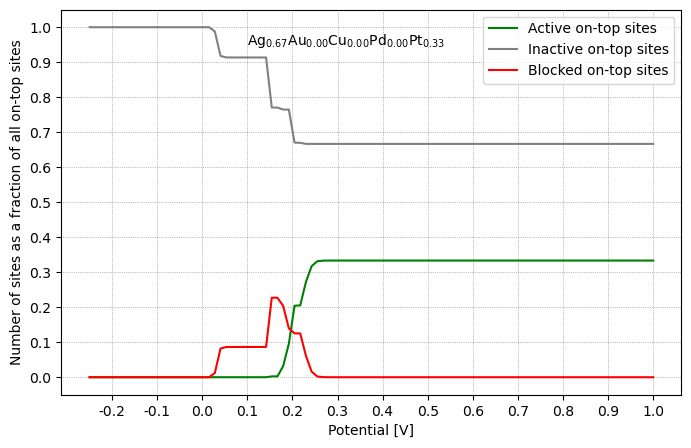

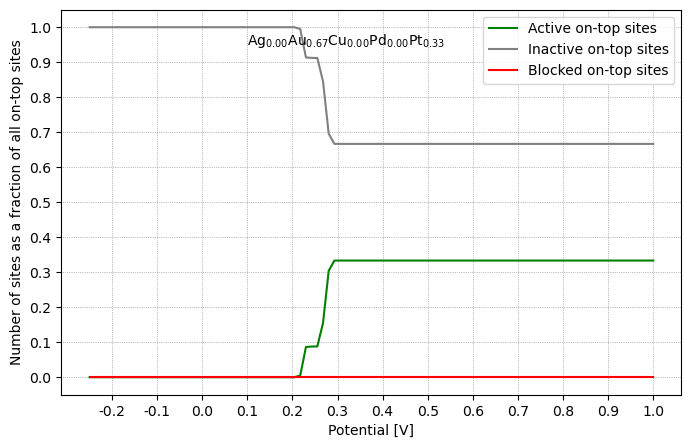

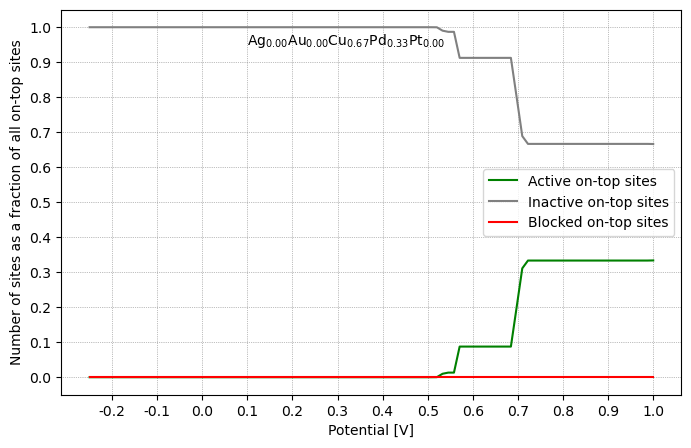

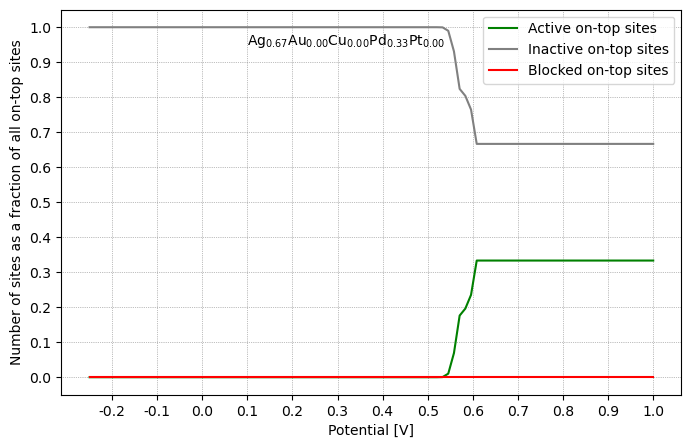

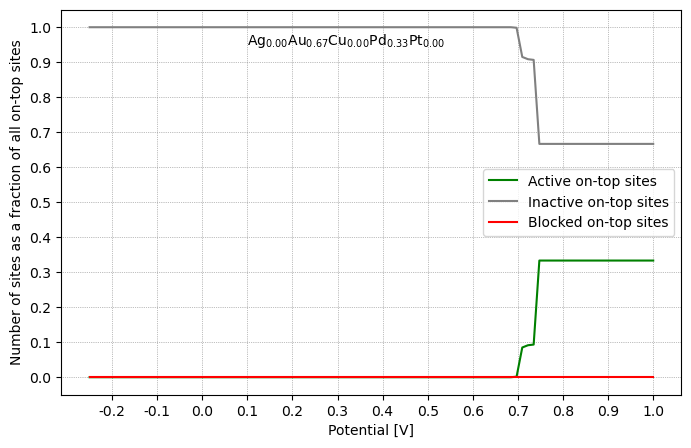

In [3]:
metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

for metal_A in metals_A:
    for metal_B in metals_B:
        split = [0, 0, 0, 0, 0]
        if metal_A == "Pt":
            split[4] += 1/3
        if metal_A == "Pd":
            split[3] += 1/3
        if metal_B == "Ag":
            split[0] += 2/3
        if metal_B == "Au":
            split[1] += 2/3
        if metal_B == "Cu":
            split[2] += 2/3
        SWR_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        SWR_surface = precompute_binding_energies_SPEED2(SWR_surface, dim_x, dim_y, models)

        # Calculate 
        potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(SWR_surface, -0.25, 1.0, 100)

        # Plot and save
        filename = metal_A+metal_B+"_SWR.png"
        counting_activity_plot(potential_range, active_list, inactive_list, blocked_list, split, filename)

## Evaluating activity with counting active sites for many molar fractions

In [2]:
dim_x, dim_y = 100, 100
molar_fractions_005 = get_molar_fractions(0.05, 5)
molar_fractions_010 = get_molar_fractions(0.10, 5)

In [5]:
active_list_list = []
inactive_list_list = []
blocked_list_list = []

molar_fractions = molar_fractions_010
Vmin, Vmax, n_points = 0.0, 1.0, 11

for stoichiometry in tqdm(molar_fractions):
    
    HEA_surface = initialize_surface(dim_x, dim_y, metals, stoichiometry)
    
    # Predict energies on all sites for both adsorbates + mixed_sites
    HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)
    
    # Calculate
    potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(HEA_surface, Vmin, Vmax, n_points)
    active_list_list.append(active_list)
    inactive_list_list.append(inactive_list)
    blocked_list_list.append(blocked_list)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [13]:
column_names = metals + ["Active", "Inactive", "Blocked"]
Ag_content = molar_fractions_010.T[0]
Au_content = molar_fractions_010.T[1]
Cu_content = molar_fractions_010.T[2]
Pd_content = molar_fractions_010.T[3]
Pt_content = molar_fractions_010.T[4]
# Lav lige et loop i stedet for 

for n, eU_string in enumerate([str(eU)[0:3:2] for eU in np.linspace(0.0, 1.0, 11)]):
    write_to_csv("../Counting_Activity/All_Fracs010_eU"+eU_string+".csv", column_names, Ag_content, Au_content, Cu_content, Pd_content, Pt_content, np.array(active_list_list).T[n], np.array(inactive_list_list).T[n], np.array(blocked_list_list).T[n])

Data has been written to ../Counting_Activity/All_Fracs010_eU00.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU01.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU02.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU03.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU04.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU05.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU06.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU07.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU08.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU09.csv
Data has been written to ../Counting_Activity/All_Fracs010_eU10.csv


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('../scripts')
from functions import *

from tqdm.notebook import tqdm

molar_fractions_005 = get_molar_fractions(0.05, 5)

active_list_list = []
inactive_list_list = []
blocked_list_list = []

molar_fractions = molar_fractions_005
Vmin, Vmax, n_points = 0.0, 1.0, 11

for stoichiometry in tqdm(molar_fractions):
    
    HEA_surface = initialize_surface(dim_x, dim_y, metals, stoichiometry)
    
    # Predict energies on all sites for both adsorbates + mixed_sites
    HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)
    
    # Calculate
    potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(HEA_surface, Vmin, Vmax, n_points)
    active_list_list.append(active_list)
    inactive_list_list.append(inactive_list)
    blocked_list_list.append(blocked_list)

column_names = metals + ["Active", "Inactive", "Blocked"]
Ag_content = molar_fractions_005.T[0]
Au_content = molar_fractions_005.T[1]
Cu_content = molar_fractions_005.T[2]
Pd_content = molar_fractions_005.T[3]
Pt_content = molar_fractions_005.T[4]

for n, eU_string in enumerate([str(eU) for eU in np.linspace(0.0, 1.0, 11)]):
    write_to_csv("../Counting_Activity/All_Fracs005_eU"+eU_string+".csv", column_names, Ag_content, Au_content, Cu_content, Pd_content, Pt_content, np.array(active_list_list).T[n], np.array(inactive_list_list).T[n], np.array(blocked_list_list).T[n])

In [ ]:
# Save that, load it again and 
# Find the best composition at each potential (eU)
# And ternary plots

## Find most active composition at each potential

In [2]:
# Load one

# Find largest number of active sites and the index

# Find the composition at that index

# I want a function to just take the filename and return the optimal split at the given potential and the number of active sites
filename = "../Counting_Activity/All_Fracs010_eU060.csv"

optimal_active_sites, optimal_split = load_max_counting_activity(filename)

#### 10% molar fractions

In [15]:
for n, eU_string in enumerate([str(eU)[0:3:2] for eU in np.linspace(0.0, 1.0, 11)]):
    filename = "../Counting_Activity/All_Fracs010_eU"+eU_string+".csv"
    optimal_active_sites, optimal_split = load_max_counting_activity(filename)
    print(eU_string)
    print(optimal_active_sites)
    print(optimal_split)
    print(stoch_to_string(optimal_split))


00
0
[1.0, 0.0, 0.0, 0.0, 0.0]
Ag$_{1.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{0.00}$Pt$_{0.00}$
01
9
[0.2, 0.2, 0.3, 0.0, 0.3]
Ag$_{0.20}$Au$_{0.20}$Cu$_{0.30}$Pd$_{0.00}$Pt$_{0.30}$
02
914
[0.7000000000000001, 0.0, 0.0, 0.0, 0.3]
Ag$_{0.70}$Au$_{0.00}$Cu$_{0.00}$Pd$_{0.00}$Pt$_{0.30}$
03
4831
[0.0, 0.0, 0.4, 0.0, 0.6000000000000001]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.40}$Pd$_{0.00}$Pt$_{0.60}$
04
10000
[0.0, 0.0, 0.0, 0.0, 1.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{0.00}$Pt$_{1.00}$
05
10000
[0.0, 0.0, 0.0, 0.0, 1.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{0.00}$Pt$_{1.00}$
06
10000
[0.0, 0.0, 0.0, 1.0, 0.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{1.00}$Pt$_{0.00}$
07
10000
[0.0, 0.0, 0.0, 1.0, 0.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{1.00}$Pt$_{0.00}$
08
10000
[0.0, 0.0, 0.0, 1.0, 0.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{1.00}$Pt$_{0.00}$
09
10000
[0.0, 0.0, 0.0, 1.0, 0.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$_{1.00}$Pt$_{0.00}$
10
10000
[0.0, 0.0, 0.0, 1.0, 0.0]
Ag$_{0.00}$Au$_{0.00}$Cu$_{0.00}$Pd$

#### 5% molar fractions

In [37]:
optimal_split_list = []
opt_act_sites_list = []
Vmin, Vmax, n_points = 0.1, 0.4, 13
potential_range = np.linspace(Vmin, Vmax, n_points)

for n, eU_string in enumerate([str(eU) for eU in np.linspace(Vmin, Vmax, n_points)]):
    filename = "../Counting_Activity/All_Fracs005_eU"+eU_string+".csv"
    optimal_active_sites, optimal_split = load_max_counting_activity(filename)

    optimal_split_list.append(optimal_split)
    opt_act_sites_list.append(optimal_active_sites)

    #print(f"Potential: {float(eU_string):.3f}")
    #print(f"optimal_active_sites: {optimal_active_sites}")
    #print(f"optimal_split: {optimal_split}")
    #print(f"Molar fraction: {stoch_to_string(optimal_split)}")
    #print("\n")

In [40]:
np.array(optimal_split_list).T # Here is individual lists with the contents of a metal through all potentials

array([[0.3 , 0.25, 0.35, 0.7 , 0.65, 0.7 , 0.6 , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.05, 0.15, 0.15, 0.05, 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.35, 0.4 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.35, 0.4 , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.3 , 0.2 , 0.3 , 0.25, 0.35, 0.3 , 0.35, 0.65, 0.6 , 1.  , 1.  ,
        1.  , 1.  ]])

## Stacked bar plot
#### Best (most active) composition at each potential

In [51]:
metal_colors

{'Pt': '#babbcb',
 'Pd': '#1f8685',
 'Ag': '#c3cdd6',
 'Cu': '#B87333',
 'Au': '#fdd766'}

In [44]:
import numpy as np

Vmin, Vmax, n_points = 0.1, 0.4, 13
potential_range = np.linspace(Vmin, Vmax, n_points)

# Create a tuple of formatted strings
tuple_of_formatted_strings = tuple([f"{value:.3f}" for value in potential_range])

# Print the tuple
print(tuple_of_formatted_strings)


('0.100', '0.125', '0.150', '0.175', '0.200', '0.225', '0.250', '0.275', '0.300', '0.325', '0.350', '0.375', '0.400')


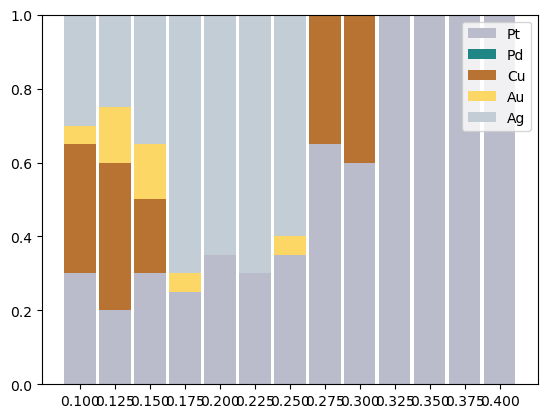

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Create a tuple of formatted strings
potential_tuple = tuple([f"{value:.3f}" for value in potential_range])

#optimal_split_dict = {
#    "Ag": np.array(optimal_split_list).T[0], # So this should be the fraction of that specific metal
#    "Au": np.array(optimal_split_list).T[1], 
#    "Cu": np.array(optimal_split_list).T[2], 
#    "Pd": np.array(optimal_split_list).T[3], 
#    "Pt": np.array(optimal_split_list).T[4], 
#}

optimal_split_dict = {
    "Pt": np.array(optimal_split_list).T[4], # So this should be the fraction of that specific metal
    "Pd": np.array(optimal_split_list).T[3], 
    "Cu": np.array(optimal_split_list).T[2], 
    "Au": np.array(optimal_split_list).T[1], 
    "Ag": np.array(optimal_split_list).T[0], 
}
bottom = np.zeros(13)
width = 0.9

fig, ax = plt.subplots()

for metal, weight_count in optimal_split_dict.items():
    p = ax.bar(potential_tuple, weight_count, width, label=metal, bottom=bottom, color = metal_colors.get(metal))
    bottom += weight_count

ax.legend(loc="upper right")

plt.show()

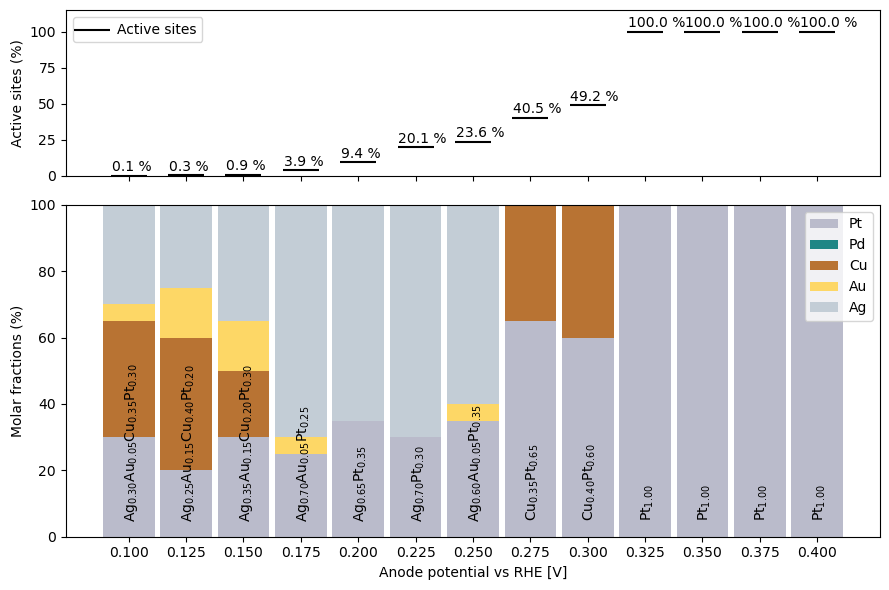

In [102]:
# Data
potential_tuple = tuple([f"{value:.3f}" for value in potential_range])
bottom = np.zeros(13)
width = 0.9

# Optimal molar fractions at each potential
optimal_split_dict = {
    "Pt": np.array(optimal_split_list).T[4]*100, # So this should be the fraction of that specific metal
    "Pd": np.array(optimal_split_list).T[3]*100, 
    "Cu": np.array(optimal_split_list).T[2]*100, 
    "Au": np.array(optimal_split_list).T[1]*100, 
    "Ag": np.array(optimal_split_list).T[0]*100, 
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(9, 6), gridspec_kw={'height_ratios': [1, 2]})

# Plot on the first subplot (ax1)
ax1.scatter(range(13), np.array(opt_act_sites_list)/(100*100)*100, label='Active sites', marker = "_", color = "black", s = 700)

for n in range(13):
    act_percent = np.array(opt_act_sites_list)[n]/(100*100)*100
    ax1.text(x = n-0.3, y = act_percent+3, s = f"{act_percent:.1f} %")

ax1.set_ylabel('Active sites (%)')
ax1.set_ylim(bottom = 0, top = 115)
ax1.legend()

for metal, weight_count in optimal_split_dict.items():
    p = ax2.bar(potential_tuple, weight_count, width, label=metal, bottom=bottom, color = metal_colors.get(metal))
    bottom += weight_count

for n in range(n_points):
    ax2.text(x = n-0.10, y = 6, s = stoch_to_string_exclusive(optimal_split_list[n]), rotation = 90)

ax2.legend(loc="upper right")

# Plot on the second subplot (ax2)

ax2.set_xlabel('Anode potential vs RHE [V]')
ax2.set_ylabel('Molar fractions (%)')
ax2.legend()

# Adjust layout for better appearance
plt.tight_layout()

plt.savefig("../figures/Best_At_Potential/5percent_01to04_13.png", dpi = 600, bbox_inches = "tight")

# Show the plot
plt.show()

# Stacked bar plot high res

In [2]:
optimal_split_list = []
opt_act_sites_list = []
Vmin, Vmax, n_points = 0.1, 0.35, 26
potential_range = np.linspace(Vmin, Vmax, n_points)

for n, eU_string in enumerate([str(eU) for eU in np.linspace(Vmin, Vmax, n_points)]):
    filename = "../Counting_Activity/HighRes_All_Fracs005_eU"+eU_string+".csv"
    optimal_active_sites, optimal_split = load_max_counting_activity(filename)

    optimal_split_list.append(optimal_split)
    opt_act_sites_list.append(optimal_active_sites)

    #print(f"Potential: {float(eU_string):.3f}")
    #print(f"optimal_active_sites: {optimal_active_sites}")
    #print(f"optimal_split: {optimal_split}")
    #print(f"Molar fraction: {stoch_to_string(optimal_split)}")
    #print("\n")

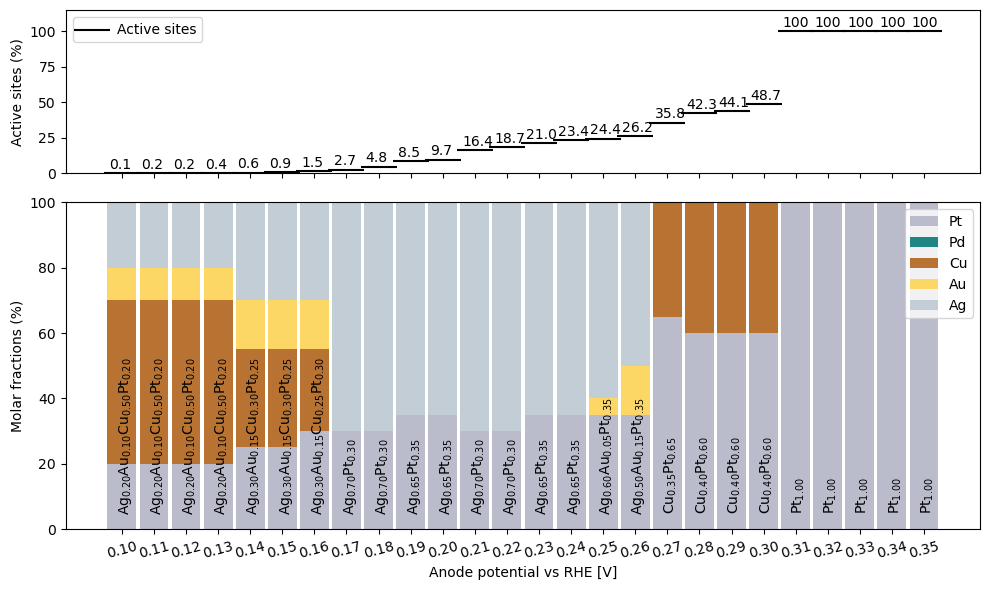

In [3]:
# Data
potential_tuple = tuple([f"{value:.3f}" for value in potential_range])
bottom = np.zeros(n_points)
width = 0.9

# Optimal molar fractions at each potential
optimal_split_dict = {
    "Pt": np.array(optimal_split_list).T[4]*100, # So this should be the fraction of that specific metal
    "Pd": np.array(optimal_split_list).T[3]*100, 
    "Cu": np.array(optimal_split_list).T[2]*100, 
    "Au": np.array(optimal_split_list).T[1]*100, 
    "Ag": np.array(optimal_split_list).T[0]*100, 
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2]})

# Plot on the first subplot (ax1)
ax1.scatter(range(n_points), np.array(opt_act_sites_list)/(100*100)*100, label='Active sites', marker = "_", color = "black", s = 700)

for n in range(n_points):
    act_percent = np.array(opt_act_sites_list)[n]/(100*100)*100
    if act_percent > 99:
        ax1.text(x = n-0.4, y = act_percent+3, s = f"{act_percent:.0f}")
    else:
        ax1.text(x = n-0.4, y = act_percent+3, s = f"{act_percent:.1f}")

ax1.set_ylabel('Active sites (%)')
ax1.set_ylim(bottom = 0, top = 115)

ax1.legend()

for metal, weight_count in optimal_split_dict.items():
    p = ax2.bar(potential_tuple, weight_count, width, label=metal, bottom=bottom, color = metal_colors.get(metal))
    bottom += weight_count

for n in range(n_points):
    ax2.text(x = n-0.15, y = 6, s = stoch_to_string_exclusive(optimal_split_list[n]), rotation = 90)

ax2.legend(loc="upper right")

# Plot on the second subplot (ax2)

ax2.set_xlabel('Anode potential vs RHE [V]')
ax2.set_ylabel('Molar fractions (%)')

# Format the tick labels
formatted_ticks = [f"{number:.2f}" for number in potential_range]
ax2.set_xticks(range(n_points))
ax2.set_xticklabels(formatted_ticks, rotation = 15)#, ha = "right")

ax2.legend()

# Adjust layout for better appearance
plt.tight_layout()

plt.savefig("../figures/Best_At_Potential/HighRes_5percent_01to04_13.png", dpi = 600, bbox_inches = "tight")

# Show the plot
plt.show()

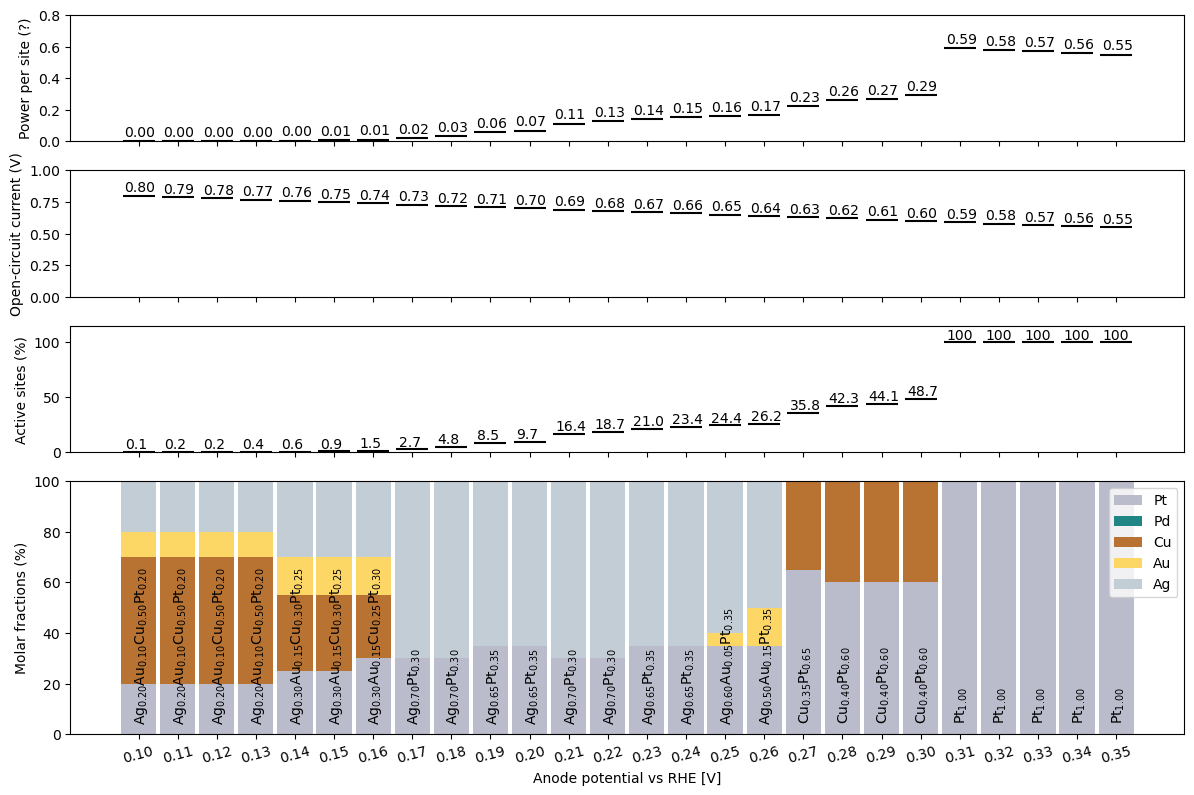

In [20]:
# Prøv at sætte power på
power_per_site_list = []
open_circuit_current_list = []
for idx, potential in enumerate(potential_range):
    power_per_site, open_circuit_current = power_puff(potential, np.array(opt_act_sites_list[idx])/(100*100))
    power_per_site_list.append(power_per_site)
    open_circuit_current_list.append(open_circuit_current)

# Data
potential_tuple = tuple([f"{value:.3f}" for value in potential_range])
bottom = np.zeros(n_points)
width = 0.9

# Optimal molar fractions at each potential
optimal_split_dict = {
    "Pt": np.array(optimal_split_list).T[4]*100, # So this should be the fraction of that specific metal
    "Pd": np.array(optimal_split_list).T[3]*100, 
    "Cu": np.array(optimal_split_list).T[2]*100, 
    "Au": np.array(optimal_split_list).T[1]*100, 
    "Ag": np.array(optimal_split_list).T[0]*100, 
}

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1, 1, 2]})

# Plot the activities
ax1.scatter(range(n_points), power_per_site_list, marker = "_", color = "black", s = 500)

ax1.set_ylabel('Power per site (?)')
ax1.set_ylim(bottom = 0, top = 0.8)

for n in range(n_points):
    power_per_site = power_per_site_list[n]
    ax1.text(x = n-0.36, y = power_per_site+0.03, s = f"{power_per_site:.2f}")

## Plot efficiency (eVs per FA oxidation)
ax2.scatter(range(n_points), open_circuit_current_list, marker = "_", color = "black", s = 500)
ax2.set_ylabel('Open-circuit current (V)')
ax2.set_ylim(bottom = 0, top = 1.0)

for n in range(n_points):
    ax2.text(x = n-0.36, y = open_circuit_current_list[n]+0.03, s = f"{open_circuit_current_list[n]:.2f}")

# Plot on the first subplot (ax1)
ax3.scatter(range(n_points), np.array(opt_act_sites_list)/(100*100)*100, marker = "_", color = "black", s = 500)

for n in range(n_points):
    act_percent = np.array(opt_act_sites_list)[n]/(100*100)*100
    if act_percent > 99:
        ax3.text(x = n-0.35, y = act_percent+3, s = f"{act_percent:.0f}")
    else:
        ax3.text(x = n-0.35, y = act_percent+3, s = f"{act_percent:.1f}")

ax3.set_ylabel('Active sites (%)')
ax3.set_ylim(bottom = 0, top = 115)

for metal, weight_count in optimal_split_dict.items():
    p = ax4.bar(potential_tuple, weight_count, width, label=metal, bottom=bottom, color = metal_colors.get(metal))
    bottom += weight_count

for n in range(n_points):
    ax4.text(x = n-0.15, y = 6, s = stoch_to_string_exclusive(optimal_split_list[n]), rotation = 90)

ax4.legend(loc="upper right")

# Plot on the second subplot (ax2)

ax4.set_xlabel('Anode potential vs RHE [V]')
ax4.set_ylabel('Molar fractions (%)')

# Format the tick labels
formatted_ticks = [f"{number:.2f}" for number in potential_range]
ax4.set_xticks(range(n_points))
ax4.set_xticklabels(formatted_ticks, rotation = 15)#, ha = "right")

ax4.legend()

# Adjust layout for better appearance
plt.tight_layout()

plt.savefig("../figures/Best_At_Potential/HighRes_POWER_5percent_01to04_13.png", dpi = 600, bbox_inches = "tight")

# Show the plot
plt.show()


### Final version with bold text and fixed y-axis labels

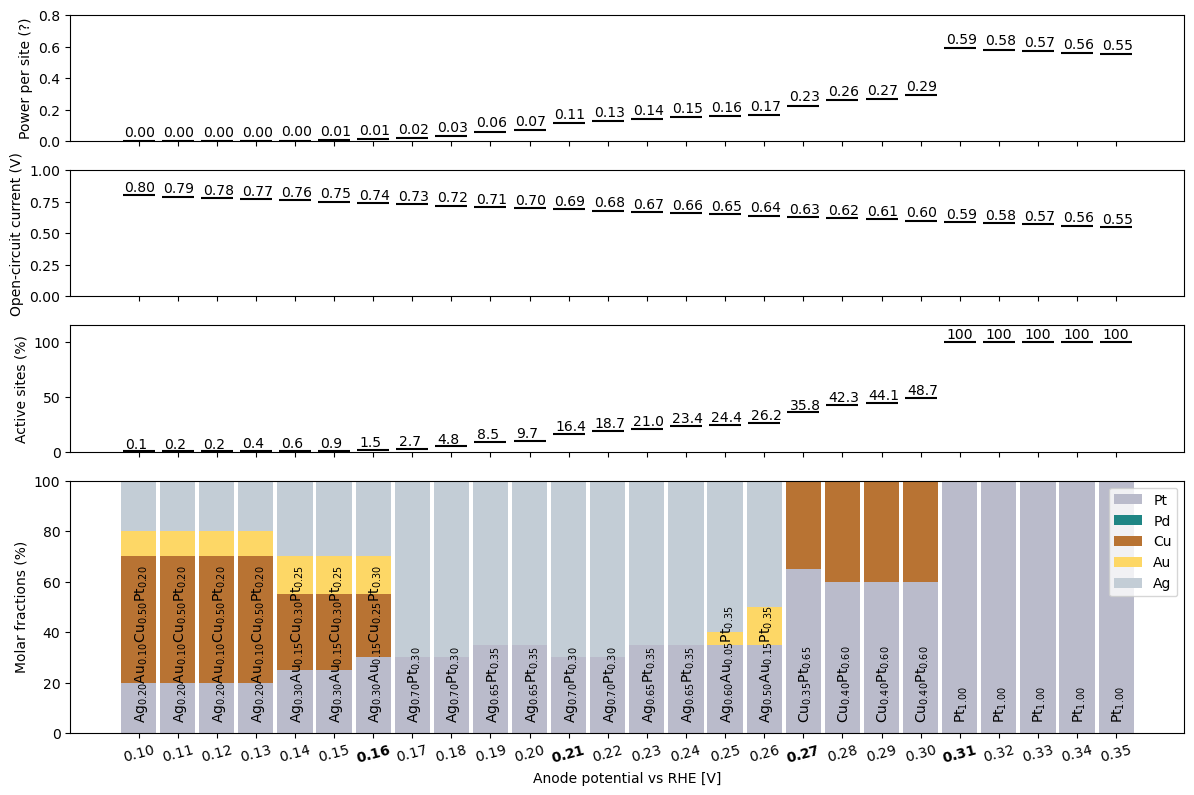

In [20]:
bold_ticks_indices = [6, 11, 17, 21]

# Prøv at sætte power på
power_per_site_list = []
open_circuit_current_list = []
for idx, potential in enumerate(potential_range):
    power_per_site, open_circuit_current = power_puff(potential, np.array(opt_act_sites_list[idx])/(100*100))
    power_per_site_list.append(power_per_site)
    open_circuit_current_list.append(open_circuit_current)

# Data
potential_tuple = tuple([f"{value:.3f}" for value in potential_range])
bottom = np.zeros(n_points)
width = 0.9

# Optimal molar fractions at each potential
optimal_split_dict = {
    "Pt": np.array(optimal_split_list).T[4]*100, # So this should be the fraction of that specific metal
    "Pd": np.array(optimal_split_list).T[3]*100, 
    "Cu": np.array(optimal_split_list).T[2]*100, 
    "Au": np.array(optimal_split_list).T[1]*100, 
    "Ag": np.array(optimal_split_list).T[0]*100, 
}

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1, 1, 2]})

# Plot the activities
ax1.scatter(range(n_points), power_per_site_list, marker = "_", color = "black", s = 500)

ax1.set_ylabel('Power per site (?)')
ax1.set_ylim(bottom = 0, top = 0.8)

for n in range(n_points):
    power_per_site = power_per_site_list[n]
    ax1.text(x = n-0.36, y = power_per_site+0.03, s = f"{power_per_site:.2f}")

## Plot efficiency (eVs per FA oxidation)
ax2.scatter(range(n_points), open_circuit_current_list, marker = "_", color = "black", s = 500)
ax2.set_ylabel('Open-circuit current (V)')
ax2.set_ylim(bottom = 0, top = 1.0)

for n in range(n_points):
    ax2.text(x = n-0.36, y = open_circuit_current_list[n]+0.03, s = f"{open_circuit_current_list[n]:.2f}")

# Plot on the first subplot (ax1)
ax3.scatter(range(n_points), np.array(opt_act_sites_list)/(100*100)*100, marker = "_", color = "black", s = 500)

for n in range(n_points):
    act_percent = np.array(opt_act_sites_list)[n]/(100*100)*100
    if act_percent > 99:
        ax3.text(x = n-0.35, y = act_percent+3, s = f"{act_percent:.0f}")
    else:
        ax3.text(x = n-0.35, y = act_percent+3, s = f"{act_percent:.1f}")

ax3.set_ylabel('Active sites (%)')
ax3.set_ylim(bottom = 0, top = 115)

for metal, weight_count in optimal_split_dict.items():
    p = ax4.bar(potential_tuple, weight_count, width, label=metal, bottom=bottom, color = metal_colors.get(metal))
    bottom += weight_count

for n in range(n_points):
    ax4.text(x = n-0.15, y = 6, s = stoch_to_string_exclusive(optimal_split_list[n]), rotation = 90)

ax4.legend(loc="upper right")

# Plot on the second subplot (ax2)

ax4.set_xlabel('Anode potential vs RHE [V]')
ax4.set_ylabel('Molar fractions (%)')

# Format the tick labels
formatted_ticks = [f"{number:.2f}" for number in potential_range]
formatted_ticks_bold = [
    fr"${number}$" if i not in bold_ticks_indices else fr"$\mathbf{{{number}}}$" for i, number in enumerate(formatted_ticks)
]
ax4.set_xticks(range(n_points))
ax4.set_xticklabels(formatted_ticks, rotation = 15)#, ha = "right")
ax4.set_xticklabels(formatted_ticks_bold, rotation=15, fontdict={'weight': 'bold'})  # Adjust font weight as needed

ax4.legend()

# Adjust layout for better appearance
plt.tight_layout()

plt.savefig("../figures/Best_At_Potential/HighRes_POWER_Bold_5percent_01to04_13.png", dpi = 600, bbox_inches = "tight")

# Show the plot
plt.show()


In [21]:
formatted_ticks_bold # lav også molar fractions bold og tallene ovenover

['$0.10$',
 '$0.11$',
 '$0.12$',
 '$0.13$',
 '$0.14$',
 '$0.15$',
 '$\\mathbf{0.16}$',
 '$0.17$',
 '$0.18$',
 '$0.19$',
 '$0.20$',
 '$\\mathbf{0.21}$',
 '$0.22$',
 '$0.23$',
 '$0.24$',
 '$0.25$',
 '$0.26$',
 '$\\mathbf{0.27}$',
 '$0.28$',
 '$0.29$',
 '$0.30$',
 '$\\mathbf{0.31}$',
 '$0.32$',
 '$0.33$',
 '$0.34$',
 '$0.35$']

In [15]:
potential_range[21]
#6, 11, 17, 21

0.30999999999999994

In [ ]:
# Put tekst på dem alle sammen. 

# Udvælg nogle interessante nedslag og lav trekantede plots - måske i lidt højere res? 

## Measuring the number of active sites on swim ring structures

#### 1/3 no special order

In [24]:
Vmin, Vmax, n_points = 0.0, 0.4, 9

metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:
        split = [0, 0, 0, 0, 0]
        if metal_A == "Pt":
            split[4] += 1/3
        if metal_A == "Pd":
            split[3] += 1/3
        if metal_B == "Ag":
            split[0] += 2/3
        if metal_B == "Au":
            split[1] += 2/3
        if metal_B == "Cu":
            split[2] += 2/3

        # Initialize the bimetal surface
        BM_surface = initialize_surface(dim_x, dim_y, metals, split)

        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        #BM_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        BM_surface = precompute_binding_energies_SPEED2(BM_surface, dim_x, dim_y, models)

        potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(BM_surface, Vmin, Vmax, n_points)

        print(metal_A+metal_B)
        print(potential_range)
        print(active_list)

PtCu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0   17  231 1707 3286 3323 3323]
PtAg
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0   19  961 2394 3127 3359 3359]
PtAu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0    0   41 1453 3185 3296 3296]
PdCu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]
PdAg
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]
PdAu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]


#### 1/7 no special structure

In [23]:
Vmin, Vmax, n_points = 0.0, 0.4, 9

metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:
        split = [0, 0, 0, 0, 0]
        if metal_A == "Pt":
            split[4] += 1/7
        if metal_A == "Pd":
            split[3] += 1/7
        if metal_B == "Ag":
            split[0] += 6/7
        if metal_B == "Au":
            split[1] += 6/7
        if metal_B == "Cu":
            split[2] += 6/7

        # Initialize the bimetal surface
        BM_surface = initialize_surface(dim_x, dim_y, metals, split)

        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        #BM_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        BM_surface = precompute_binding_energies_SPEED2(BM_surface, dim_x, dim_y, models)

        potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(BM_surface, Vmin, Vmax, n_points)

        print(metal_A+metal_B)
        print(potential_range)
        print(active_list)

PtCu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0   15   70  491 1483 1483 1483]
PtAg
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0   23  346 1343 1407 1407 1407]
PtAu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0    0    5  238 1479 1479 1479]
PdCu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]
PdAg
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]
PdAu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]


#### 1/3 swim ring structures surfaces, let's see what these bad boys can do

In [29]:
Vmin, Vmax, n_points = 0.0, 0.4, 9

metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:

        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        SWR_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        SWR_surface = precompute_binding_energies_SPEED2(SWR_surface, dim_x, dim_y, models)

        potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(SWR_surface, Vmin, Vmax, n_points)
        
        print(metal_A+metal_B)
        print(potential_range)
        print(active_list)

PtCu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0  691  878 2295 3334 3334 3334]
PtAg
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0   22  993 3300 3334 3334 3334]
PtAu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[   0    0    0    0    0  862 3334 3334 3334]
PdCu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]
PdAg
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]
PdAu
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]
[0 0 0 0 0 0 0 0 0]


## Plotting the number of different sites as a function of the potential (eU) for special interesting surfaces

### For example: Most CO-resistant bimetals 1/3 and 1/7 and SWR-structured surface

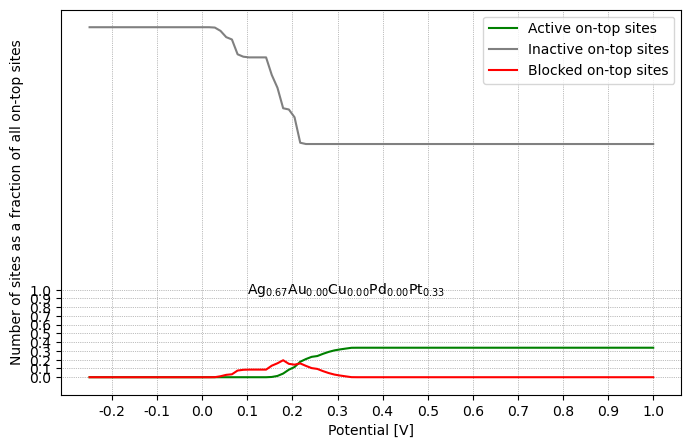

In [27]:
# Loan code from 
# Initialize a surface from a given stochiometry
dim_x, dim_y, split = 200, 200, [2/3 , 0.0 , 0.0 , 0.0 , 1/3 ]

HEA_surface = initialize_surface(dim_x, dim_y, metals, split)

# Predict energies on all sites for both adsorbates + mixed_sites
HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)

# Calculate 
potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(HEA_surface, -0.25, 1.0, 100)

# Plot and save
filename = "BM_1_3_PtAg_BEST.png"
counting_activity_plot(potential_range, active_list, inactive_list, blocked_list, split, filename)

In [25]:
# I should have this side by side with the energies from that specific surface to show how it looks. 

['Ag', 'Au', 'Cu', 'Pd', 'Pt']

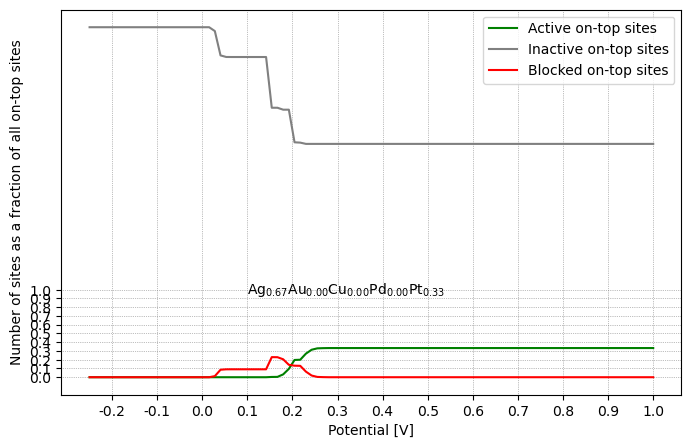

In [30]:
# Loan code from 
# Initialize a surface from a given stochiometry
metal_A, metal_B = "Pt", "Ag"

SWR_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
SWR_surface = precompute_binding_energies_SPEED2(SWR_surface, dim_x, dim_y, models)

# Calculate 
potential_range, active_list, inactive_list, blocked_list = counting_activity_scan(SWR_surface, -0.25, 1.0, 100)

# Plot and save
filename = "SWR_1_3_PtAg_BEST.png"
counting_activity_plot(potential_range, active_list, inactive_list, blocked_list, split, filename)

## Triangle activity plots

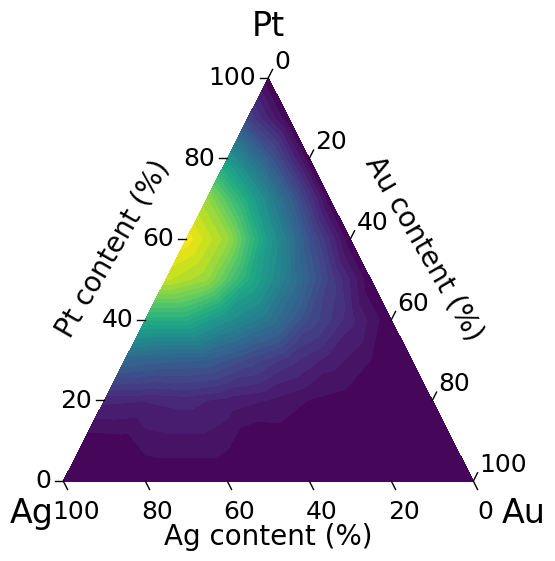

In [41]:
filename = "../Counting_Activity/All_Fracs010_eU020.csv"
df = pd.read_csv(filename)

active_list = df["Active"]

molar_fractions = np.array([np.array(df[metal]) for metal in metals]).T

# Create a mask based on the condition
mask = np.sum(molar_fractions[:, [0, 1, 4]], axis=1) == 1.0
molar_fractions_PtAgAu = molar_fractions[mask]
active_list_PtAgAu = active_list[mask]

molar_fractions_PtAgAu = remove_columns(molar_fractions_PtAgAu, [0, 1, 4])

#molar_fractions_PtAgAu = [molar_fractions[n] for n in range(len(molar_fractions)) if (molar_fractions[n][0]+molar_fractions[n][1]+molar_fractions[n][4])==1.0]
#molar_fractions_PtAgAu = remove_columns(molar_fractions_PtAgAu, [0, 1, 4])

fig, ax = make_empty_plot()

fs = molar_fractions_PtAgAu
zs = active_list_PtAgAu
ax = ax
elems = ["Ag", "Au", "Pt"]
filename = "AgAuPt_Ternary_Plot.png"
make_ternary_contour_plot(fs, zs, ax, elems, filename)


In [33]:


# Use the mask to select the corresponding molar fractions
selected_molar_fractions = molar_fractions[mask]


In [36]:
len(selected_molar_fractions)

62

62

array([0.3])

In [23]:
metals

['Ag', 'Au', 'Cu', 'Pd', 'Pt']

In [22]:
len(molar_fractions)

1001